# Resources
- Networkx Guide: https://networkx.guide/
- Netorkx references: https://networkx.org/documentation/stable/reference/index.html
- Book: Graph Theory and complex networks

# Types of graphs

## Graph
A graph is a collection of Nodes (could be anything e.g. people, stations, buildings, facilities, ...) and edges, which connect a pair of nodes. 

## Node
= Vertex, connected with their neighbors by edges

## edge
= branch, connection between two nodes, can be written as a tuple of the connected nodes

In [146]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# a graph 
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (0, 3), (0, 2), (2, 3)])

# print nodes
list(G.nodes)

[0, 1, 2, 3]

In [52]:
list(G.edges)

[(0, 1), (0, 3), (0, 2), (1, 2), (2, 3)]

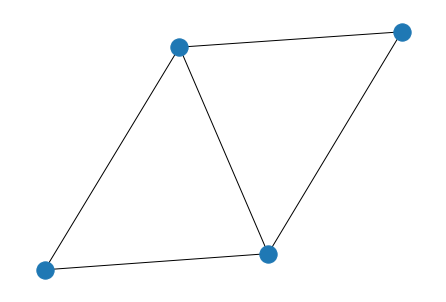

In [71]:
nx.draw(G)

## undirected graphs
If the edges are unsorted tupels, we have an undirected graph. This means we can go from node v to node w by the edge (v,w) and we can go from w to v through the edge (w,v) where (w,v) and (v,w) are the same edge.

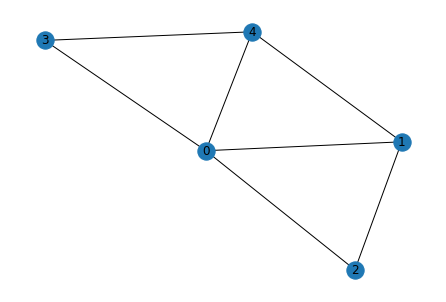

In [9]:
und_G = nx.Graph()

und_G.add_edges_from([(0,1), (1,2), (0,2), (0,3), (0,4), (1,4), (3,4)])
labels = {node: node for node in (list(und_G.nodes))}
nx.draw(und_G, labels = labels)

## directed graphs
In a directed graph the tuples are sorted, and therefore have a direction. It matters which of the nodes is the starting node and which is the end node. The edge (v,w) allows to travel from v to w but not vice versa. The edges in a directed graph can be referred to as arcs or arrows as well. The tail of the arc is the starting node and the head is pointing to the end node.

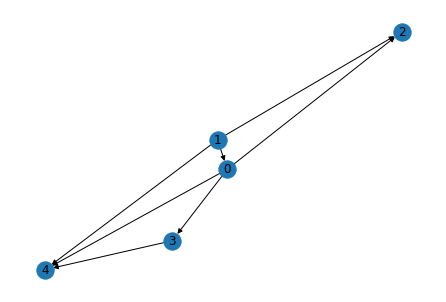

In [12]:
di_graph = nx.DiGraph()
di_graph.add_edges_from([(1,0), (1,2), (0,2), (0,3), (0,4), (1,4), (3,4)])
labels = {node: node for node in (list(und_G.nodes))}
nx.draw(di_graph, labels = labels)

## unweighted graphs
If we just want to show whether two nodes have a relationship and which nodes can be reached from a starting node, we use unweighted graphs, that means, that we just look at yes (1) there is a connection or no (0) there is no connection.

## weighted graphs
If we want to express the strength, distance, similarity, etc. of nodes in a graph we assign weights to the edges.

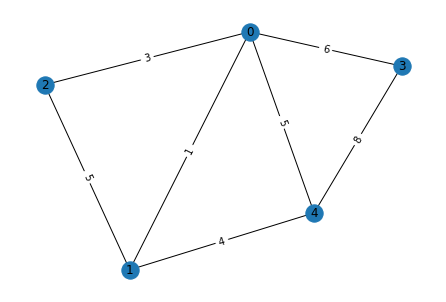

In [29]:
w_und_G = nx.Graph()
w_und_G.add_edges_from([(0,1, {'weight': 1}), (1,2, {'weight': 5}), (0,2, {'weight': 3}), (0,3, {'weight': 6}), (0,4, {'weight': 5}), (1,4, {'weight': 4}), (3,4, {'weight': 8})])
labels = {node: node for node in (list(w_und_G.nodes))}
edge_labels = nx.get_edge_attributes(w_und_G, 'weight')

pos = nx.spring_layout(w_und_G)
nx.draw(w_und_G, pos, labels = labels)
nx.draw_networkx_edge_labels(w_und_G, pos, edge_labels = edge_labels)
plt.show()

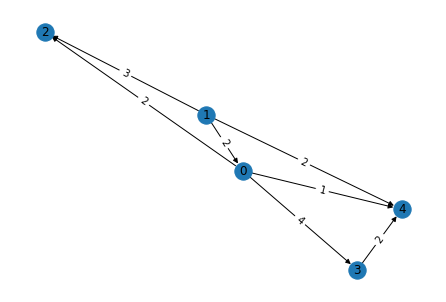

In [34]:
w_Di_graph = nx.DiGraph()
w_Di_graph.add_edges_from([(1,0, {'weight': 2}), (1,2, {'weight': 3}), (0,2, {'weight': 2}), (0,3, {'weight': 4}), (0,4, {'weight': 1}), (1,4, {'weight': 2}), (3,4, {'weight': 2})])
labels = {node: node for node in (list(und_G.nodes))}
edge_label = nx.get_edge_attributes(w_Di_graph, 'weight')

pos = nx.spring_layout(w_Di_graph)
nx.draw(w_Di_graph, pos, labels = labels)
nx.draw_networkx_edge_labels(w_Di_graph, pos, edge_labels = edge_label)
plt.show()

## degree
A node can be described by looking on the number of edges and therefore neighboring nodes. The sum of the edges incident to the node is called the degree. In weighted graphs we sum the weights, in unweighted graphs we sum the number of incident edges. For directed graphs we distinguish the indegree and the outdegree.

The number of edges incident with a vertex v is called the degree of v, denoted as delta(v). Loops are counted twice.

In [40]:
# degree of unweighted undirected graph
und_G.degree # get the degree view, dictionary like node: degree
und_G.degree[0] # degree for one node not in dictionary or view format

4

In [54]:
# total degree of unweighted directed graph
di_graph.degree
di_graph.degree[0]
di_graph.degree()

# indegree
di_graph.in_degree # dictionary like

# outdegree
di_graph.out_degree

OutDegreeView({1: 3, 0: 3, 2: 0, 3: 1, 4: 0})

In [49]:
# degree of weighted undirected graph
w_und_G.degree('weight')[0]
for node in list(w_und_G.nodes):
    print(w_und_G.degree('weight')[node])

4
3
2
2
3


In [62]:
# degree of weighted directed graphs
w_Di_graph.degree('weight')[0]
for node in list(w_Di_graph.nodes):
    print(w_Di_graph.degree('weight')[node])

# indegree 
w_Di_graph.in_degree('weight')[0]
for node in list(w_Di_graph.nodes):
    print(w_Di_graph.in_degree('weight')[node])

# outdegree
w_Di_graph.out_degree('weight')[0]
for node in list(w_Di_graph.nodes):
    print(w_Di_graph.out_degree('weight')[node])

3
4
2
2
3
0
1
2
1
3
3
3
0
1
0


## Vertex degree sum
For all graphs G, the sum of the vertex degrees is twice the number
of edges, that is,
sum(delta(v) = 2 * |E(G)|

In [106]:
# edge set size
nx.number_of_edges(G)

# degree sum
sum_delta = 0
for node in list(G.nodes):
    sum_delta += G.degree[node]
sum_delta

# test whether degree sum equals 2 times the edge set size
sum_delta == 2* nx.number_of_edges(G)

True

The number of vertices with an odd degree must be even, given that the vertex sum must be even due to the factor 2 in the edge set and the sum of even vertex degrees is even as well, because you cannot derive a odd number from a sum of even numbers. Hence, the vertices with odd degree must be even as well.

## degree sequence
The distribution of vertex degrees can provide insight in the organization of a network. The listing of the vertex degrees of a graph gives us the degree sequence. Ordering of degree in descending order gives an ordered degree sequence. If all vertices are of same degree the graph is called regular.

In [142]:
degree_sequence = [d for n, d in G.degree()]
degree_sequence.sort(reverse = True)
degree_sequence

[4, 3, 3, 3, 2, 2, 1]

## Regular graph
Each vertex has the same degree. A graph is k-regular if each vertex has a degree of k. For instance a graph with all its vertices having a degree of 3 is a 3-regular graph, often referred to as cubic graph. 

## Havel-Hakimi theorem on graphical degree lists
A list of numbers s = [d1,d2,....,dn] in descending order is said to be graphic if and only if s* = [d*1, d*2,...,d*n1] with n-1 numbers is graphic as well. d*i is di+1 - 1 for i = 1,2,...,d1 or di+1 otherwise. if s* is graphic then s is graphic as well and vice versa.

Two graphs with the same degree sequence need not be the same graph. It is possible to derive several different graphs from one degree sequence.

In [108]:
# check whether a sequence is graphical
s1 = [4, 4, 3, 2, 1]
s2 = [4, 4, 4, 4, 4]
nx.is_graphical(s1)
nx.is_graphical(s2)

True

# complete graph
A graph in which all nodes are adjacent to each other.

36

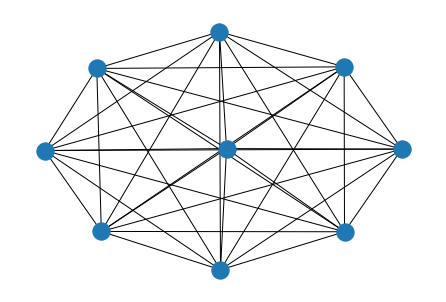

In [66]:
comp_G = nx.complete_graph(9)
nx.draw(comp_G)
comp_G.size()

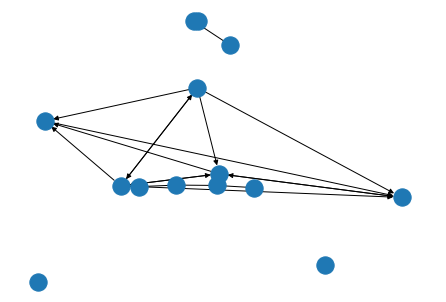

In [77]:
# complement
comp = nx.complement(G)
nx.draw(comp)

comp1 = nx.complement(und_G)
nx.draw(comp1)

comp2 = nx.complement(di_graph)
nx.draw(comp2)

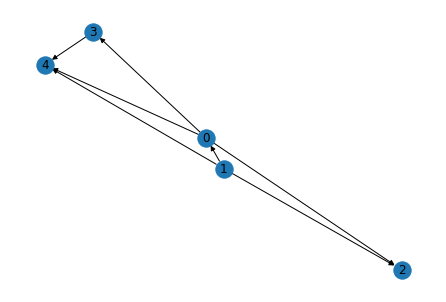

In [81]:
nx.draw(di_graph, with_labels = True)

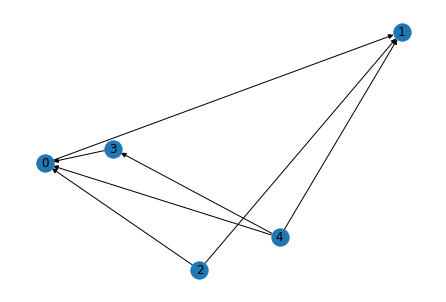

In [80]:
# reverse the directions in a graph
rev = nx.reverse(di_graph)

nx.draw(rev, with_labels = True)

## Subgraphs and line graphs
Subgraphs consist of a subset of edges and vertices of a graph. Induced subgraphs are constructed by taking a subset of veritces and adding each edge form the original graph that connects the subgroup vertices.

Line graphs are constructed by representing each edge as a vertex amd joining two vertices if and only if edges are incident with the same vetex in the original graph.

[1, 2, 3]


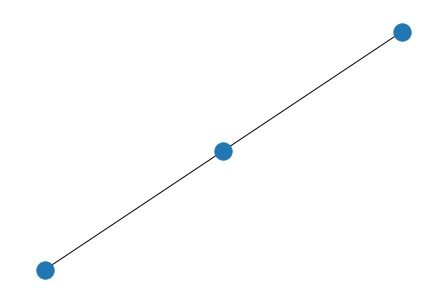

In [112]:
# filter_node and filter_edge are functions/callable
def filter_node(n1):
    return n1 != 0

view = nx.subgraph_view(G, filter_node=filter_node)
print(view.nodes())
nx.draw(view)

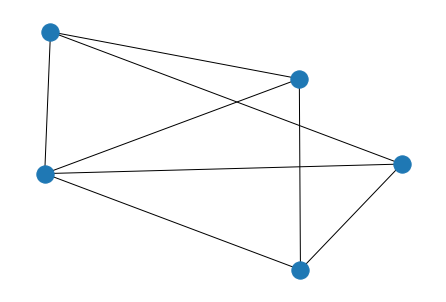

In [120]:
nx.draw(nx.line_graph(G))

# Neighboring set
For any graph G and vertex v 2 V(G), the neighbor set N(v) of v is the set of vertices (other than v) adjacent to v, that is
N(v) def= {w element of V(G) |  v != w, it exist an e element E(G) : e = <u, v>} The set of vertices w in G, with w not equal to v, such that there exists anedge e in G that joins v and w.

In [103]:
# adjacency view
G.adj

# adjacent nodes of a node as a list
print(list(G.adj[0]))

# adjacency matrix
adj_mat = nx.adjacency_matrix(G).todense()
adj_mat
adj_mat1 =nx.to_numpy_array(G, weight = None)
adj_mat1
w_adj_mat = nx.to_numpy_array(w_und_G, weight = 'weight')
w_adj_mat

[1, 3, 2]


C:\Users\chiar\AppData\Local\Temp/ipykernel_4012/2708549732.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_mat = nx.adjacency_matrix(G).todense()


array([[0., 1., 3., 6., 5.],
       [1., 0., 5., 0., 4.],
       [3., 5., 0., 0., 0.],
       [6., 0., 0., 0., 8.],
       [5., 4., 0., 8., 0.]])

## Trees
Networks, in which no cycles exist and between each pair of nodes exists only one unique path. (Skip for now)

## DAG's
Directed acyclic graphs are graphs, which do not contain any cycles, this means, that there is no set of nodes which depends on each other.

// Could nodes in a DAG be code blocks and by walking through them topologically sorted get executed?

## Graph representations (adjacencey matrix, incidence matrix, edge list)

A graph can be written as adjacency matrix. This is a matrix with n rows and n columns, representing the vertecies. An entry represents the number of edges joining vertex (row index) and vertex (column index). Properties:
- symmetric (for undirected graphs)
- graph is simple if and only if for all i,j A[i,j] <= 1 and A[i,i] == 0, only one edge between each pair of vertices and  no edge joining a vertex to itself
- rowsum is equal to the vertex degree of that row

Incidence matrix has n rows and m columns, where M[i,j] counts the number of times that edge ej is incident with vertx vi. 

More memory efficient way of representing a graph is an edge list. The edge list contains the edges as tuples of the nodes the edge connects.

In [144]:
# adjacency matrix: rows and columns are nodes
A = nx.to_numpy_array(und_G)
A
#nx.adjacency_matrix(und_G).todense()
#A = numpy.array(A, dtype = numpy.float64)

array([[0., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1.],
       [1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 1., 0., 1., 0.]])

In [124]:
# incidence matrix: rows are the nodes, columns are the edges
nx.incidence_matrix(und_G).todense()

C:\Users\chiar\AppData\Local\Temp/ipykernel_4012/829566102.py:1: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.incidence_matrix(und_G).todense()


array([[1., 1., 1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 1.]])

In [ ]:
# edge list
# read an unweighted edgelist
#read_edgelist(path, comments='#', delimiter=None, create_using=None, nodetype=None, data=True, edgetype=None, encoding='utf-8')
# write an unweighted edgelist
#write_edgelist(G, path[, comments, ...])
# read a weighted edgelist
#read_weighted_edgelist(path[, comments, ...])
# write a weighted edgelist
#write_weighted_edgelist(path[, comments, ...])

0 1
0 2
0 3
1 2
1 3
2 3
3 4
4 5
5 6
0 1 {}
0 2 {}
0 3 {}
1 2 {'weight': 3}
1 3 {}
2 3 {}
3 4 {'capacity': 12}
4 5 {}
5 6 {}


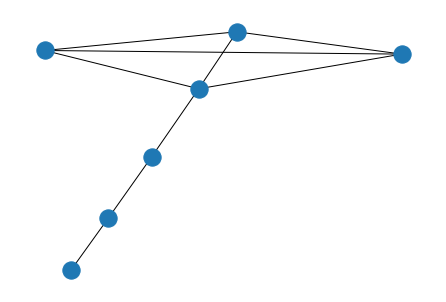

In [127]:
G = nx.lollipop_graph(4, 3)
nx.draw(G)
G[1][2]["weight"] = 3
G[3][4]["capacity"] = 12
for line in nx.generate_edgelist(G, data=False):
    print(line)
for line in nx.generate_edgelist(G):
    print(line)

## degree matrix

The degree matrix is diagonal matrix with the degree on the main diagonal and 0s otherwise. It is a n x n matrix for n nodes of a graph.

In [147]:
# degree matrix
diag = A.sum(axis=1) # degree sequence 
D = np.diag(diag) # degree matrix
D

array([[4., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 3.]])

## Graph isomorphism
Two graphs G and G* are isomorhic if we can uniquely map the vertices and edges of G to G* such that if two vertices were joined in G by a number of edges, their counterparts in G* will be joined by the same number of edges. Necessary criteria, which need to be fullfilled that graphs are isomorphic:
- same number of vertices and edges
- same ordered degree sequence
If two graphs G and G* are isomorphic, then their respective ordered degree sequences should be the same. However, these criteria are necessary conditions, not sufficient condition, meaning that fullfilling not necessarily indicates isomorphism. It is still required to manually chec.

In [143]:
G1 = nx.lollipop_graph(4,1)
G2 = nx.complete_graph(5)

# check with networkx builtin functions
nx.could_be_isomorphic(G1, G2)
nx.is_isomorphic(G1, G2)

# check with criterion 1: same number of vertices and edges
print(G1.number_of_nodes(), G2.number_of_nodes())
print(G1.number_of_edges(), G2.number_of_edges()) # not same number of edges

# check with criterion 2: same degree sequence
deg_seq1 = [d for n, d in G1.degree()]
deg_seq1.sort(reverse = True)
deg_seq2 = [d for n, d in G2.degree()]
deg_seq2.sort(reverse = True)
print(deg_seq1, deg_seq2)

5 5
7 10
[4, 3, 3, 3, 1] [4, 4, 4, 4, 4]


# Connectivity
Is a measure for whether and how a node can be reached. A end node is connected to start node if there can be found a chain of adjacent nodes leading from starting node to the end node (=path)

## Walk
Alternating sequence of vertices and edges, for which is true that the pair of vertices is joint by the edge inbetween them in the sequence: v0,vk-walk is described by [v0, e1, v1, e2,...,vk-1,ek,vk] with ei = <vi-1, vi>. In a closed walk v0 = vk. Nodes and edges can be reused.

## Trail
A walk in which the edges are distinct. Nodes can be reused. If start node and end node are the same it is a closed trail. An Euler trail is characterized by visiting each edge of a graph.

## Path
A path is a walk with distinct edges and nodes, meaning that each node and edge can be visited exactly once. 

implementation find simple paths algorithm (https://www.baeldung.com/cs/simple-paths-between-two-vertices)

## Cycle
A path for which the exception reuse of starting node is available: Starting and end node are the same all other nodes need to be distinct, all edges need to be distinct. --> the start node needs to have an degree >= 2.

## Hamilton path
Each node in a graph is visited. The resulting path is called hamilton path.

## Connectivity of two veritices
Two distinct vertices u and v in a graph G are connected if there exists a (u,v)-path in G. 

## Graph connectivity
A graph G is connected if all pairs of distinct vertices are connected.

In [176]:
# all simple paths from source node to target node in a graph:
#all_simple_paths(G, source, target, cutoff=None) cutoff min number of edges
# returns node list
list(nx.all_simple_paths(G, 0, 4))
list(nx.all_simple_paths(G, 0, 4, 3))

# returns edge list
#all_simple_edge_paths(G, source, target, cutoff=None)
list(nx.all_simple_edge_paths(G, 0, 4))
list(nx.all_simple_edge_paths(G, 0, 4, 3))

# check whether a node sequence is a simple path
#is_simple_path(G, nodes)
nx.is_simple_path(G, [0, 1, 2])

# find all simple paths ordering from shortest to longest
#shortest_simple_paths(G, source, target, weight=None)
list(nx.shortest_simple_paths(G, 0, 4))
list(nx.shortest_simple_paths(w_und_G, 0, 4, weight = 'weight'))

[[0, 4], [0, 1, 4], [0, 2, 1, 4], [0, 3, 4]]

all nodes in G: [0, 1, 2, 3, 4]
[0, 3, 4]
shortest path from source to target: [0, 3, 4]


[0, 1, 2, 3, 4]

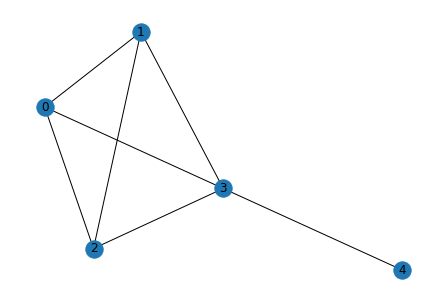

In [241]:
# shortest path methods unweighted graphs
#shortest_path(G, source=None, target=None, weight=None, method='dijkstra')
print('all nodes in G:', G1.nodes)
nx.draw(G1, with_labels = True)
print(nx.shortest_path(G1, 0, 4))
print('shortest path from source to target:', nx.shortest_path(G1, 0, 4))

#list(nx.get_edge_attributes(w_und_G, 'weight')
list(nx.shortest_path(G1))

In [182]:
# all shortest paths in a graph
#all_shortest_paths(G, source, target, weight=None, method='dijkstra')
list(nx.all_shortest_paths(w_und_G, 0, 3))

[[0, 3]]

In [219]:
# shortest path length
#shortest_path_length(G, source=None, target=None, weight=None, method='dijkstra')
G = nx.path_graph(5)
nx.shortest_path_length(G, source=0, target=4)

p = nx.shortest_path_length(G, source=0)  # target not specified
p
p[4]

p = nx.shortest_path_length(G, target=4)  # source not specified
p[0]

p = dict(nx.shortest_path_length(G))  # source,target not specified
p
p[0][4]

4

In [223]:
# check whether there exists a path between two nodes
G1.nodes
nx.has_path(G1, 0, 3)

True

{0: {0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]},
 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 3, 4]},
 2: {2: [2], 1: [2, 1], 3: [2, 3], 0: [2, 1, 0], 4: [2, 3, 4]},
 3: {3: [3], 2: [3, 2], 4: [3, 4], 1: [3, 2, 1], 0: [3, 2, 1, 0]},
 4: {4: [4], 3: [4, 3], 2: [4, 3, 2], 1: [4, 3, 2, 1], 0: [4, 3, 2, 1, 0]}}

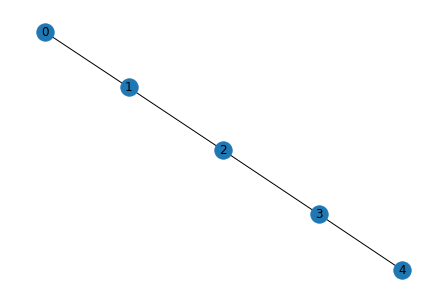

In [244]:
G = nx.path_graph(5)
nx.draw(G, with_labels = True)
path = dict(nx.all_pairs_shortest_path(G))
path

{(0, 1): 1, (0, 2): 3, (0, 3): 6, (0, 4): 5, (1, 2): 5, (1, 4): 4, (3, 4): 8}


[0, 4]

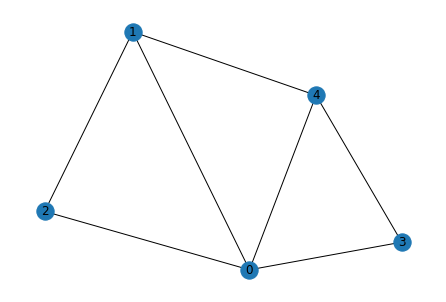

In [255]:
# shortest path for weighted graphs
#single_source_dijkstra_path(G, source, cutoff=None, weight='weight')
nx.draw(w_und_G, with_labels = True)
print(nx.get_edge_attributes(w_und_G, 'weight'))
path =nx.single_source_dijkstra_path(w_und_G, source = 0, weight='weight')
path[4]

## shortest paths, especially Dijkstra's shortest path alogrithm

Further reading on the concept of shortest paths: https://networkx.guide/algorithms/shortest-path

Dijkstra:
shortest_path(G, source=None, target=None, weight=None, method='dijkstra')
The first input parameter of the method, G, is a NetworkX graph. The second parameter, source, is the source node of the shortest path. If it’s not specified, the method will compute the shortest path for all nodes. The third parameter, target, is the target node of the shortest path. If it’s not specified, the method will compute the shortest path to all possible nodes. The fourth parameter, weight, represents the edge attribute that should be used as the edge weight. If it’s not specified, the weight of all edges will be 1.

Method output
The output of the method is a list or dictionary with all the requested shortest paths. Paths are represented as lists of nodes.
Explanation and pseudocode for Dijkstra algorithm (https://networkx.guide/algorithms/shortest-path/dijkstra/)

In [259]:
edges = [(1,2, {'weight':4}),
        (1,3,{'weight':2}),
        (2,3,{'weight':1}),
        (2,4, {'weight':5}),
        (3,4, {'weight':8}),
        (3,5, {'weight':10}),
        (4,5,{'weight':2}),
        (4,6,{'weight':8}),
        (5,6,{'weight':5})]
edge_labels = {(1,2):4, (1,3):2, (2,3):1, (2,4):5, (3,4):8, (3,5):10, (4,5):2, (4,6):8, (5,6):5}
   
        
G = nx.Graph()
for i in range(1,7):
    G.add_node(i)
G.add_edges_from(edges)

pos = nx.planar_layout(G)

# This will give us all the shortest paths from node 1 using the weights from the edges. 
p1 = nx.shortest_path(G, source=1, weight='weight')

# This will give us the shortest path from node 1 to node 6.
p1to6 = nx.shortest_path(G, source=1, target=6, weight='weight')

# This will give us the length of the shortest path from node 1 to node 6.
length = nx.shortest_path_length(G, source=1, target=6, weight='weight')

print('All shortest paths from 1:', p1)
print('Shortest path from 1 to 6:', p1to6)
print('Length of the shortest path:', length)


All shortest paths from 1: {1: [1], 2: [1, 3, 2], 3: [1, 3], 4: [1, 3, 2, 4], 5: [1, 3, 2, 4, 5], 6: [1, 3, 2, 4, 5, 6]}
Shortest path from 1 to 6: [1, 3, 2, 4, 5, 6]
Length of the shortest path: 15


## Connectivity in directed graphs

### Strongly connected
A directed graph is strongly connected or strong, if there exists a directed path between each pair of vertices in the graph.

### weakly connected
A directed graph is weakly connected or weak, if there exists a undirected path between each pair of nodes --> the underlying undirected graph is connected.

### Reachability/reachable
A vertex is said to be rachable if there ecists a directed path from a staring vertex to a end vertex.

In [ ]:
#is_reachable(G, s, t) works for tournament graphs: Torunament graphs
# do have exactly one directed edge joining each pair of distinct nodes

## connected components
If a graph consists of vertices which are not connected to all other vertices, this leads to several components of connected subgraphs. A subgraph H of G is called a component of G if H is connected and not contained in a connected subgraph of G with more vertices or edges. The number of components of G is denoted as omega(G).

Note: A component is a maximal connected subgraph.

[{1, 2, 3, 4}, {5, 6, 7, 8}]

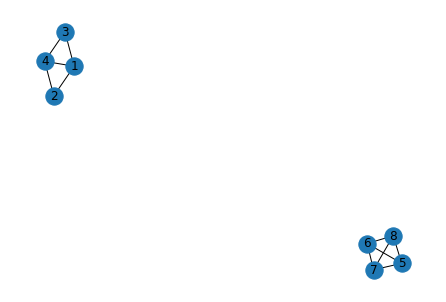

In [306]:
# get k edge components
import itertools as it
paths = [
    (1, 2, 4, 3, 1, 4),
    (5, 6, 7, 8, 5, 7, 8, 6),]
G3 = nx.Graph()
G3.add_nodes_from(it.chain(*paths))
G3.add_edges_from(it.chain(*[nx.utils.pairwise(path) for path in paths]))
nx.draw(G3, with_labels = True)
# note this returns {1, 4} unlike k_edge_subgraphs
sorted(map(sorted, nx.k_edge_components(G3, k=3)))
list(nx.k_edge_components(G3, k = 2))

{3: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}],
 2: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}],
 1: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}]}

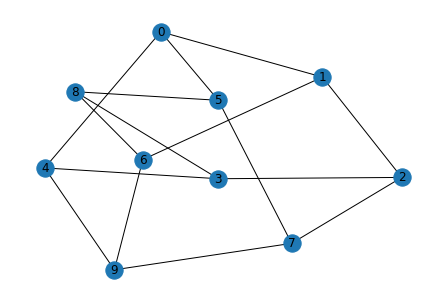

In [311]:
G4 = nx.petersen_graph()
nx.draw(G4, with_labels = True)
k_components = nx.k_components(G4)
k_components


## Robustness
The robustness of a graph/network reveals how well the network stays connected while removing nodes or edges. The set of removed nodes, which leads to a partitioning/disconnection is called a vertex cut, similarly an edge cut is a set of removed edges, which led to a paritioning/disconnection of the graph.

## vertex cut
For a grph G let V* be the subset of V(G) and E* the subset of E(G). V* is called a vertex cut if omega(G - V*) > omega(G). This means: if the set V* induces new components when removing V* from the graph then V* is a vertex cut. If V* consists from only one vertex it is called a cut vertex.

## edge cut
If omega(G - E*) > omega(G); then E* is called an edge cut. If E* consists onnly of one edge, this edge is a cut edge.

## minimal vertex cut of connected graph
The minimal vertex cut indicates how many vertices are needed to be removed to diconnect it. k(G) is the size of a minimal vertex cut. 
- lambda(G) is the size of the minimal edge cut. k(G) <= lambda(G). 
- lambda(G) <= minimal delta(V(G))
--> k(G) <= lambda(G) <= min{delta(v) | v element of V(G)}

Every graph is at most deltamin-edge connected and at most deltamin-connected, where deltamin = min{delta(v) | v element of V(G)}

{4, 5}

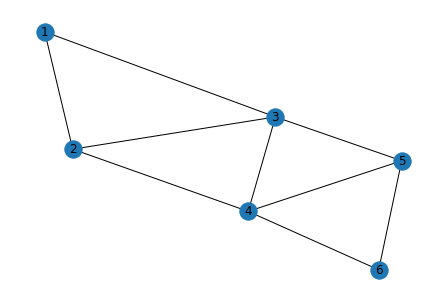

In [297]:
# minimum_edge_cut(G[, s, t, flow_func]) Returns a set of edges of minimum cardinality that disconnects G.
nx.draw(G, with_labels = True)
nx.minimum_edge_cut(G)

#minimum_node_cut(G[, s, t, flow_func]) Returns a set of nodes of minimum cardinality that disconnects G.
nx.minimum_node_cut(G)

## k-connected
A graph for which k(G) >= k is k-connected. It is k-edge-connected if lambda(G) >= k.

## optimally connected
k(G) = lambda(G) = min{delta(v) | v element of V(G)}

In [285]:
#algorithms for finding k-edge-connected components connectivity : algorithms for determening edge connectivity.
#k_edge_augmentation(G, k[, avail, weight, ...]): Finds set of edges to k-edge-connect G.
#is_k_edge_connected(G, k): Tests to see if a graph is k-edge-connected.
nx.is_k_edge_connected(G, 2)
nx.is_k_edge_connected(G, 3)

False

[{3, 4}, {4, 5}, {2, 3}]

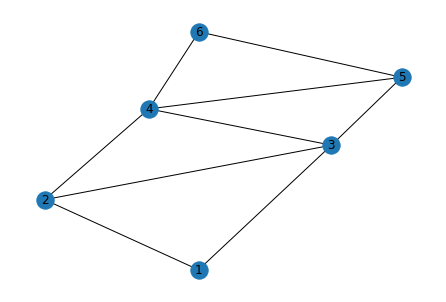

In [288]:
# all node cutsets of a graph
#all_node_cuts(G, k=None, flow_func=None) k cna be passed or derived
nx.draw(G, with_labels = True)
list(nx.all_node_cuts(G))

In [290]:
# node_connectivity(G[, s, t, flow_func]) Returns node connectivity for a graph or digraph G.
nx.node_connectivity(G)
nx.node_connectivity(G, 2, 3)

3

In [292]:
# edge_connectivity(G[, s, t, flow_func, cutoff]) Returns the edge connectivity of the graph or digraph G.
nx.edge_connectivity(G)
nx.edge_connectivity(G, 2, 3)

3

In [293]:
#all_pairs_node_connectivity(G[, nbunch, ...]) Compute node connectivity between all pairs of nodes of G.
nx.all_pairs_node_connectivity(G)

{1: {2: 2, 3: 2, 4: 2, 5: 2, 6: 2},
 2: {1: 2, 3: 3, 4: 2, 5: 2, 6: 2},
 3: {1: 2, 2: 3, 4: 3, 5: 2, 6: 2},
 4: {1: 2, 2: 2, 3: 3, 5: 3, 6: 2},
 5: {1: 2, 2: 2, 3: 2, 4: 3, 6: 2},
 6: {1: 2, 2: 2, 3: 2, 4: 2, 5: 2}}

In [294]:
# average_node_connectivity(G[, flow_func]) Returns the average connectivity of a graph G.
nx.average_node_connectivity(G)

2.2

## vertex independent
a pth is vertex independt if for all (u,v) paths the Vertex set of each path is a intersection with only the nodes u and v. Paths are vertex independent if they share only the start and end vertex.

## edge independent
The collection is edge indepenent if for all its u,v paths the intersection of the path edges sets is empty. Paths are edge independent if they have no edges in common.

## Mengers theorem
G is a graph with the non-adjacent vertices u and v. The minimum number of vertices in a vertex cut that disconnect u and v = max number of pairwise vertex-indpendent paths between u and v.

That means if there exist 3 vertex-independent paths between u and v, the minimum vertex cut is 3.

The minimum number of edges in an edge cut that disconnects u an v = maximum number of pairwise edge-independetn paths between u and v.

## Corollary from Mengers theorem
A graph G is k-connected if and only if any two distinct vertices are connected by at least k pariwise vertex independent paths. (if each pair of vertices is connected by k vertex independent paths the graph is k-connected). G is k-edge connected if and only if any two distinct veritces are connected by at least k pariwise edge independent paths.

## Corollary
Each edge of a 2-edge connected graph lies on a cycle.

3

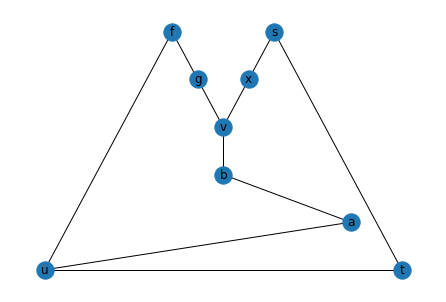

In [282]:
# Mengers theorem
menger_G = nx.Graph()
menger_G.add_edges_from([('u', 't'), 
                         ('t', 's'), 
                         ('s', 'x'), 
                         ('x', 'v'), 
                         ('u', 'a'), 
                         ('a', 'b'), 
                         ('b', 'v'), 
                         ('u', 'f'), 
                         ('f', 'g'), 
                         ('g', 'v')])

pos = nx.planar_layout(menger_G)
nx.draw(menger_G, pos = pos, with_labels = True)

all_paths = list(nx.all_simple_paths(menger_G, 'u', 'v'))

# all vertex independent paths between two vertices
v_independent = list(nx.node_disjoint_paths(menger_G, 'u', 'v'))

# number of vertex independent paths
len(v_independent)

# all edge independent paths between two vertices
e_independent = list(nx.edge_disjoint_paths(menger_G, 'u', 'v'))
e_independent

# number of edge independent paths
len(e_independent)

# Drawing graphs aka how to embed them

embedding = graph representation on a surface, where the vertices are associated with points on that surface. So if you have a plane as a surface the vertices are defined by x and y coordinates.

## circular embedding
All nodes are arranged at evenly spaced points on a circle. This has the advantage that no 3 vertices lie on the same straight line/no 3 vertices are ever collinear.

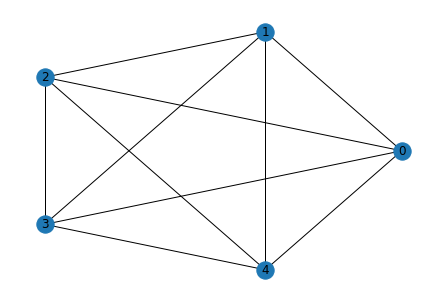

In [315]:
G = nx.complete_graph(5)
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, with_labels = True)  # Draw the original graph


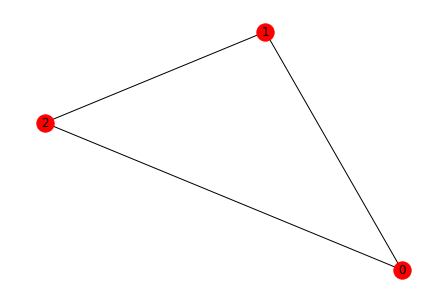

In [317]:
# Draw a subgraph, reusing the same node positions
nx.draw(G.subgraph([0, 1, 2]), pos=pos, with_labels = True, node_color="red")

Intersting topics for further studies:
- tournament
- Voroni cells